# Problem statement
You  are  working  at  a  technology-oriented  company.  The  Human  Resources  (HR)  department  is  about  to  start  a 
pre-emptive program towards mitigation of mental health issues amongst the company’s staff. HR has contacted 
you as one of the company's data scientists to support the program with quantitative analyses. You are provided 
with  the  results  of  a  survey,  which  has  been  conducted  amongst  technology-oriented  employees  and  which  is 
considered  representative  for  your  company  as  well.

### Challenges
- High Dimensionality
- Missing Values
- Non standard text inputs

### Goals
1. Provide better overview of the data (EDA, data cleansing, dimensionality reduction, etc...)
2. Cluster survey participants, and provide visualizations and interpreations of cluster's characteristics

## Imports

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Disabling results truncation in pandas functions 
pd.options.display.max_rows = None
pd.options.display.max_columns = None

plt.style.use('ggplot')

In [103]:
raw_data = pd.read_csv('/home/hualcosa/Documents/MACHINE LEARNING UNSUPERVISED LEARNING AND FEATURE ENGINEERING/course_case_study/mental-heath-in-tech-2016_20161114.csv')
raw_data.head()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

what are the dimensions of the data?

In [104]:
raw_data.shape

(1433, 63)

data types:

In [105]:
raw_data.dtypes

Are you self-employed?                                                                                                                                                                int64
How many employees does your company or organization have?                                                                                                                           object
Is your employer primarily a tech company/organization?                                                                                                                             float64
Is your primary role within your company related to tech/IT?                                                                                                                        float64
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    object
Do you know the options for mental health care available und

### Renaming cols

In [106]:
old_cols = raw_data.columns.tolist()
new_cols =  ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
            'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
            'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
            'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
            'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
            'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
            'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
            'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
            'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
            'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
            'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
            'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
            'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']

old_to_new_cols = {k:v for k, v in zip(old_cols, new_cols)}

In [107]:
# mapping of original names to abbreviations for clarity purpose
old_to_new_cols

{'Are you self-employed?': 'self_empl_flag',
 'How many employees does your company or organization have?': 'comp_no_empl',
 'Is your employer primarily a tech company/organization?': 'tech_comp_flag',
 'Is your primary role within your company related to tech/IT?': 'tech_role_flag',
 'Does your employer provide mental health benefits as part of healthcare coverage?': 'mh_coverage_flag',
 'Do you know the options for mental health care available under your employer-provided coverage?': 'mh_coverage_awareness_flag',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'mh_employer_discussion',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'mh_resources_provided',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'mh_anonimity_flag',
 'If a me

In [108]:
tmp = raw_data.rename(columns=old_to_new_cols)
tmp.head(1)

self_empl_flag comp_no_empl  tech_comp_flag  tech_role_flag  \
0               0       26-100             1.0             NaN   

                  mh_coverage_flag mh_coverage_awareness_flag  \
0  Not eligible for coverage / N/A                        NaN   

  mh_employer_discussion mh_resources_provided mh_anonimity_flag  \
0                     No                    No      I don't know   

  mh_medical_leave mh_discussion_neg_impact ph_discussion_neg_impact  \
0        Very easy                       No                       No   

  mh_discussion_cowork mh_discussion_supervis mh_eq_ph_employer  \
0                Maybe                    Yes      I don't know   

  mh_conseq_coworkers  mh_coverage_flag2 mh_online_res_flag  \
0                  No                NaN                NaN   

  mh_diagnosed&reveal_clients_flag mh_diagnosed&reveal_clients_impact  \
0                              NaN                                NaN   

  mh_diagnosed&reveal_cowork_flag mh_cowork_reveal_neg_impact mh_prod_impact  \
0                             NaN                         NaN            NaN   

  mh_prod_impact_perc  prev_employers_flag prev_mh_benefits  \
0                 NaN                    1     No, none did   

  prev_mh_benefits_awareness prev_mh_discussion prev_mh_resources  \
0  N/A (not currently aware)       I don't know          None did   

  prev_mh_anonimity prev_mh_discuss_neg_conseq prev_ph_discuss_neg_conseq  \
0      I don't know               Some of them               None of them   

       prev_mh_discussion_cowork  prev_mh_discussion_supervisor  \
0  Some of my previous employers  Some of my previous employers   

  prev_mh_importance_employer prev_mh_conseq_coworkers  \
0                I don't know             None of them   

  future_ph_specification why/why_not future_mh_specification why/why_not2  \
0                   Maybe         NaN                   Maybe          NaN   

  mh_hurt_on_career            mh_neg_view_cowork mh_sharing_friends/fam_flag  \
0             Maybe  No, I don't think they would               Somewhat open   

  mh_bad_response_workplace mh_for_others_bad_response_workplace  \
0                        No                                  NaN   

  mh_family_hist mh_disorder_past mh_disorder_current yes:what_diagnosis?  \
0             No              Yes                  No                 NaN   

  maybe:whats_your_diag mh_diagnos_proffesional  \
0                   NaN                     Yes   

                             yes:condition_diagnosed  \
0  Anxiety Disorder (Generalized, Social, Phobia,...   

   mh_sought_proffes_treatm mh_eff_treat_impact_on_work  \
0                         0        Not applicable to me   

  mh_not_eff_treat_impact_on_work  age   sex    country_live live_us_teritory  \
0            Not applicable to me   39  Male  United Kingdom              NaN   

     country_work work_us_teritory       work_position remote_flag  
0  United Kingdom              NaN  Back-end Developer   Sometimes

data in the sex column need to be properly encoded

In [109]:
tmp['sex'].str.lower().value_counts().sort_index()

 female                                                                                                                                                            1
afab                                                                                                                                                               1
agender                                                                                                                                                            2
androgynous                                                                                                                                                        1
bigender                                                                                                                                                           1
cis female                                                                                                                                                         1
cis male  

In [110]:
tmp['sex'] = tmp['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'male').replace(
                  to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'female').replace(
                  to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'other')

standardizing "number of company employees" column values

In [111]:
tmp['comp_no_empl'].value_counts()

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: comp_no_empl, dtype: int64

In [112]:
tmp['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

Fixing outlier values in Age column

In [113]:
tmp['age'].describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

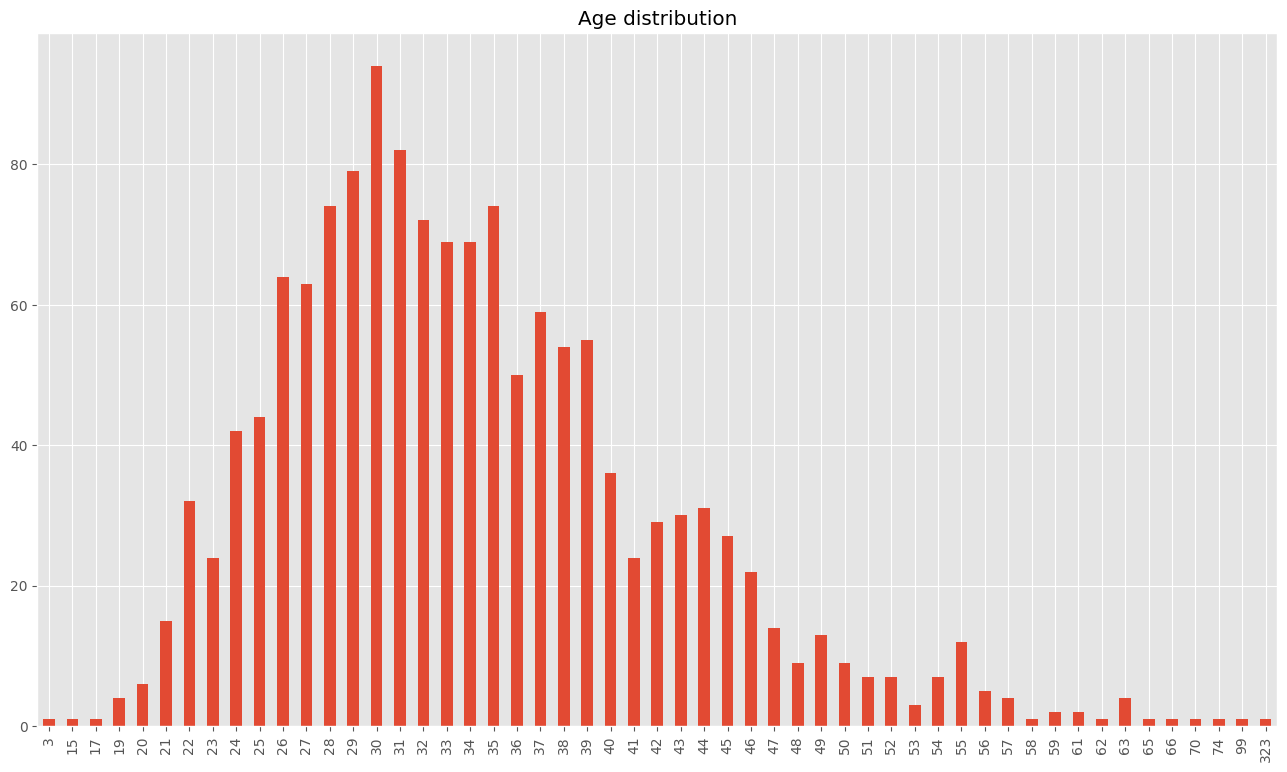

In [114]:
plt.figure(figsize=(16, 9))
tmp['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age distribution')
plt.show()

In [115]:
# computing mean age
ftr = (tmp['age'] >= 18) & (tmp['age'] <= 75) 
avg_age = tmp[ftr]['age'].mean()
# replacing values that lay outside this boundary with the mean value
tmp.loc[~ftr, 'age'] = avg_age


In [116]:
tmp['age'].describe()

count    1433.000000
mean       34.086134
std         8.072144
min        19.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64

### MISSING VALUE INVESTIGATION

<AxesSubplot: >

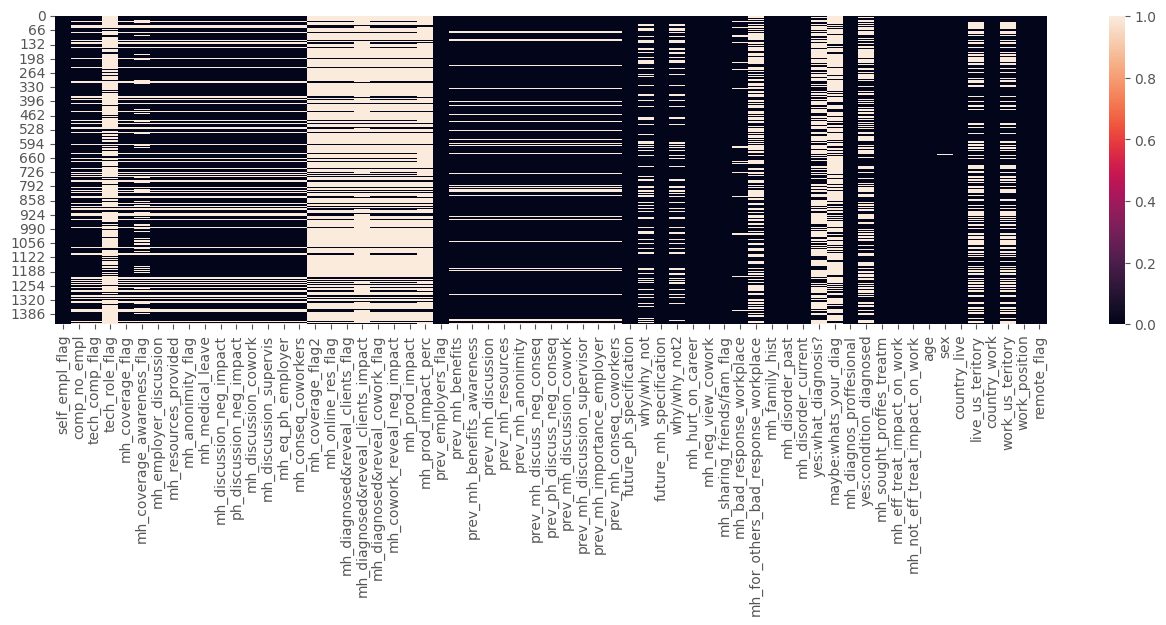

In [117]:
plt.figure(figsize = (16,4))
sns.heatmap(data = tmp.isna())

In [118]:
tmp.isna().sum().sort_values(ascending=False)

mh_diagnosed&reveal_clients_impact      1289
mh_prod_impact_perc                     1229
tech_role_flag                          1170
mh_online_res_flag                      1146
mh_coverage_flag2                       1146
mh_prod_impact                          1146
mh_cowork_reveal_neg_impact             1146
mh_diagnosed&reveal_cowork_flag         1146
mh_diagnosed&reveal_clients_flag        1146
maybe:whats_your_diag                   1111
yes:what_diagnosis?                      865
mh_for_others_bad_response_workplace     776
yes:condition_diagnosed                  722
live_us_teritory                         593
work_us_teritory                         582
mh_coverage_awareness_flag               420
why/why_not                              338
why/why_not2                             307
comp_no_empl                             287
mh_eq_ph_employer                        287
mh_discussion_supervis                   287
mh_discussion_cowork                     287
ph_discuss

As we can see, some columns are constitued mainly of null values. I will filter out null data where MORE THAN 50%
of the data is missing.


In [119]:
cols_to_drop = (tmp.isna().sum() > tmp.shape[0] / 2)
tmp = tmp.loc[:, ~cols_to_drop]

Imputing missing values with most frequent values 

In [120]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
tmp = pd.DataFrame(imputer.fit_transform(tmp), columns=tmp.columns)
tmp.isna().sum()

self_empl_flag                     0
comp_no_empl                       0
tech_comp_flag                     0
mh_coverage_flag                   0
mh_coverage_awareness_flag         0
mh_employer_discussion             0
mh_resources_provided              0
mh_anonimity_flag                  0
mh_medical_leave                   0
mh_discussion_neg_impact           0
ph_discussion_neg_impact           0
mh_discussion_cowork               0
mh_discussion_supervis             0
mh_eq_ph_employer                  0
mh_conseq_coworkers                0
prev_employers_flag                0
prev_mh_benefits                   0
prev_mh_benefits_awareness         0
prev_mh_discussion                 0
prev_mh_resources                  0
prev_mh_anonimity                  0
prev_mh_discuss_neg_conseq         0
prev_ph_discuss_neg_conseq         0
prev_mh_discussion_cowork          0
prev_mh_discussion_supervisor      0
prev_mh_importance_employer        0
prev_mh_conseq_coworkers           0
f

For statistics about a population to be relevant we need to have at least 30 data points for a specific group. <br>
If we take a look at location specific columns, we will notice some minority groups. In this part, I am going to regroup
these smaller categories in a new one called 'other'.

In [121]:
for col in ['country_live','live_us_teritory', 'country_work', 'work_us_teritory']:
    ftr = tmp[col].value_counts() < 30
    minorities = set(tmp[col].value_counts()[ftr].index)
    tmp[col] = tmp[col].apply(lambda val: val if val not in minorities else 'other')

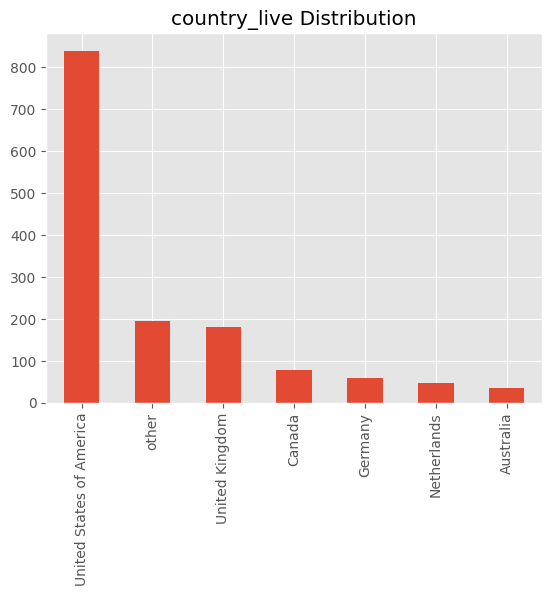

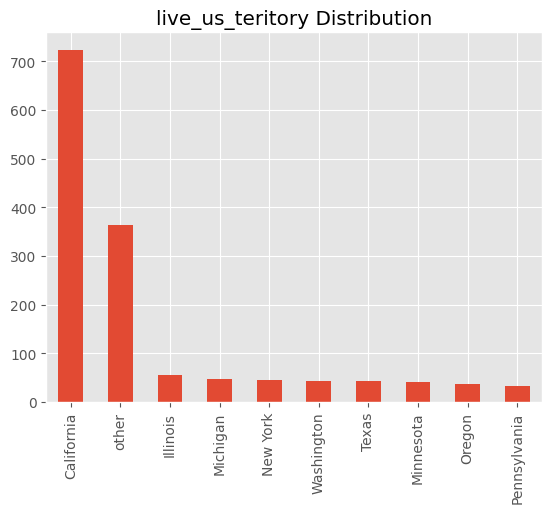

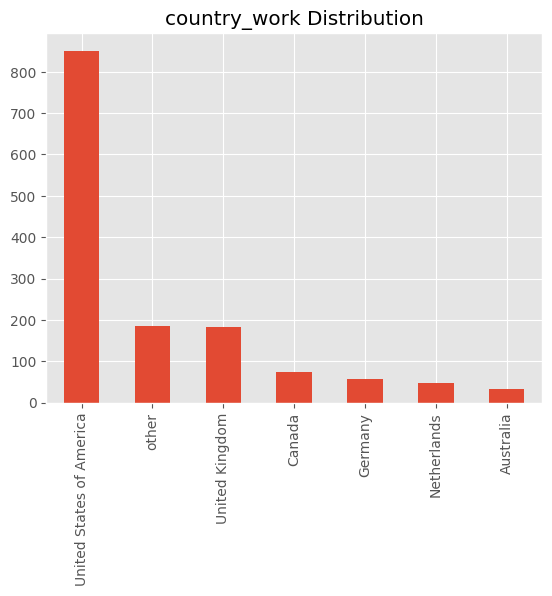

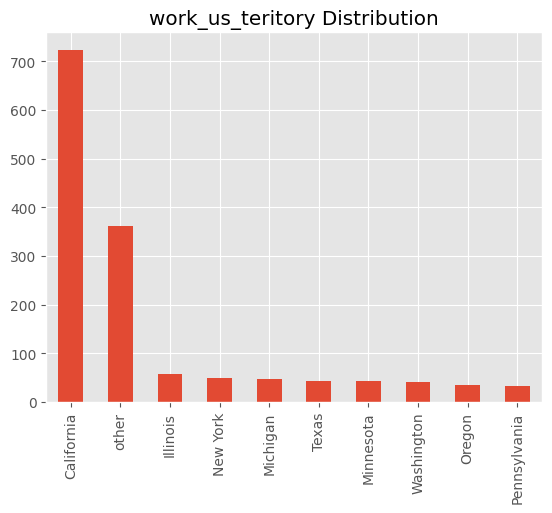

In [122]:
for col in ['country_live','live_us_teritory', 'country_work', 'work_us_teritory']:
    tmp[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.show()

The original column that identified whether the person worked in a tech role had too many missing data and was eliminated. Let's reengineer it using the work_position column

In [123]:
def is_tech_role(name):
    l_name = name.lower()
    for cat in ['back-end', 'front-end', 'devops']:
        if cat in l_name:
            return 1
    return 0 
tmp['tech_role_flag'] = tmp['work_position'].apply(is_tech_role)
tmp['tech_role_flag'].value_counts()

1    1007
0     426
Name: tech_role_flag, dtype: int64

In [124]:
tmp.head(1)

self_empl_flag comp_no_empl tech_comp_flag                 mh_coverage_flag  \
0              0       26-100            1.0  Not eligible for coverage / N/A   

  mh_coverage_awareness_flag mh_employer_discussion mh_resources_provided  \
0                         No                     No                    No   

  mh_anonimity_flag mh_medical_leave mh_discussion_neg_impact  \
0      I don't know        Very easy                       No   

  ph_discussion_neg_impact mh_discussion_cowork mh_discussion_supervis  \
0                       No                Maybe                    Yes   

  mh_eq_ph_employer mh_conseq_coworkers prev_employers_flag prev_mh_benefits  \
0      I don't know                  No                   1     No, none did   

  prev_mh_benefits_awareness prev_mh_discussion prev_mh_resources  \
0  N/A (not currently aware)       I don't know          None did   

  prev_mh_anonimity prev_mh_discuss_neg_conseq prev_ph_discuss_neg_conseq  \
0      I don't know               Some of them               None of them   

       prev_mh_discussion_cowork  prev_mh_discussion_supervisor  \
0  Some of my previous employers  Some of my previous employers   

  prev_mh_importance_employer prev_mh_conseq_coworkers  \
0                I don't know             None of them   

  future_ph_specification             why/why_not future_mh_specification  \
0                   Maybe  Fear of discrimination                   Maybe   

  why/why_not2 mh_hurt_on_career            mh_neg_view_cowork  \
0       Stigma             Maybe  No, I don't think they would   

  mh_sharing_friends/fam_flag mh_bad_response_workplace mh_family_hist  \
0               Somewhat open                        No             No   

  mh_disorder_past mh_disorder_current mh_diagnos_proffesional  \
0              Yes                  No                     Yes   

  mh_sought_proffes_treatm mh_eff_treat_impact_on_work  \
0                        0        Not applicable to me   

  mh_not_eff_treat_impact_on_work   age   sex    country_live  \
0            Not applicable to me  39.0  male  United Kingdom   

  live_us_teritory    country_work work_us_teritory       work_position  \
0       California  United Kingdom       California  Back-end Developer   

  remote_flag  tech_role_flag  
0   Sometimes               1

### Encoding

In [125]:
nominal_cols = ['self_empl_flag', 'tech_comp_flag', 'mh_coverage_flag',
       'mh_coverage_awareness_flag', 'mh_employer_discussion',
       'mh_resources_provided', 'mh_anonimity_flag', 'mh_medical_leave',
       'mh_discussion_neg_impact', 'ph_discussion_neg_impact',
       'mh_discussion_cowork', 'mh_discussion_supervis', 'mh_eq_ph_employer',
       'mh_conseq_coworkers', 'prev_employers_flag', 'prev_mh_benefits',
       'prev_mh_benefits_awareness', 'prev_mh_discussion', 'prev_mh_resources',
       'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq',
       'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork',
       'prev_mh_discussion_supervisor', 'prev_mh_importance_employer',
       'prev_mh_conseq_coworkers', 'future_ph_specification',
       'future_mh_specification', 'mh_hurt_on_career',
       'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag',
       'mh_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past',
       'mh_disorder_current', 'mh_diagnos_proffesional',
       'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work',
       'mh_not_eff_treat_impact_on_work', 'sex', 'country_live',
       'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position',
       'remote_flag', 'tech_role_flag']
ordinal_cols = ['comp_no_empl']
numerical_cols = ['age']
text_cols = ['why/why_not', 'why/why_not2']

# making sure we are not missing any column
assert len(nominal_cols + ordinal_cols + numerical_cols + text_cols) == tmp.shape[1]


In [126]:
from sklearn.preprocessing import LabelEncoder
# encoding nominal cols
nominal_encoded = pd.get_dummies(tmp[nominal_cols], drop_first=True)
# encoding ordinal cols
le = LabelEncoder()
ordinal_encoded = le.fit_transform(tmp[ordinal_cols]).reshape(-1, 1)
ordinal_encoded = pd.DataFrame(ordinal_encoded, columns=['comp_size'])

encoded_data = pd.concat([nominal_encoded, ordinal_encoded, tmp[numerical_cols]], axis=1)
encoded_data.head(1)

tech_role_flag  self_empl_flag_1  tech_comp_flag_1.0  mh_coverage_flag_No  \
0               1                 0                   1                    0   

   mh_coverage_flag_Not eligible for coverage / N/A  mh_coverage_flag_Yes  \
0                                                 1                     0   

   mh_coverage_awareness_flag_No  mh_coverage_awareness_flag_Yes  \
0                              1                               0   

   mh_employer_discussion_No  mh_employer_discussion_Yes  \
0                          1                           0   

   mh_resources_provided_No  mh_resources_provided_Yes  mh_anonimity_flag_No  \
0                         1                          0                     0   

   mh_anonimity_flag_Yes  mh_medical_leave_Neither easy nor difficult  \
0                      0                                            0   

   mh_medical_leave_Somewhat difficult  mh_medical_leave_Somewhat easy  \
0                                    0                               0   

   mh_medical_leave_Very difficult  mh_medical_leave_Very easy  \
0                                0                           1   

   mh_discussion_neg_impact_No  mh_discussion_neg_impact_Yes  \
0                            1                             0   

   ph_discussion_neg_impact_No  ph_discussion_neg_impact_Yes  \
0                            1                             0   

   mh_discussion_cowork_No  mh_discussion_cowork_Yes  \
0                        0                         0   

   mh_discussion_supervis_No  mh_discussion_supervis_Yes  \
0                          0                           1   

   mh_eq_ph_employer_No  mh_eq_ph_employer_Yes  mh_conseq_coworkers_Yes  \
0                     0                      0                        0   

   prev_employers_flag_1  prev_mh_benefits_No, none did  \
0                      1                              1   

   prev_mh_benefits_Some did  prev_mh_benefits_Yes, they all did  \
0                          0                                   0   

   prev_mh_benefits_awareness_N/A (not currently aware)  \
0                                                  1      

   prev_mh_benefits_awareness_No, I only became aware later  \
0                                                  0          

   prev_mh_benefits_awareness_Yes, I was aware of all of them  \
0                                                  0            

   prev_mh_discussion_None did  prev_mh_discussion_Some did  \
0                            0                            0   

   prev_mh_discussion_Yes, they all did  prev_mh_resources_Some did  \
0                                     0                           0   

   prev_mh_resources_Yes, they all did  prev_mh_anonimity_No  \
0                                    0                     0   

   prev_mh_anonimity_Sometimes  prev_mh_anonimity_Yes, always  \
0                            0                              0   

   prev_mh_discuss_neg_conseq_None of them  \
0                                        0   

   prev_mh_discuss_neg_conseq_Some of them  \
0                                        1   

   prev_mh_discuss_neg_conseq_Yes, all of them  \
0                                            0   

   prev_ph_discuss_neg_conseq_Some of them  \
0                                        0   

   prev_ph_discuss_neg_conseq_Yes, all of them  \
0                                            0   

   prev_mh_discussion_cowork_Some of my previous employers  \
0                                                  1         

   prev_mh_discussion_cowork_Yes, at all of my previous employers  \
0                                                  0                

   prev_mh_discussion_supervisor_No, at none of my previous employers  \
0                                                  0                    

   prev_mh_discussion_supervisor_Some of my previous employers  \
0                                                  1             

   prev_

getting mapping for label encoder:

In [127]:
def get_label_encoder_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res
get_label_encoder_mapping(le)

{'1-5': 0, '100-500': 1, '26-100': 2, '500-1000': 3, '6-25': 4, '>1000': 5}

In [128]:
# normalizing age column
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
encoded_data['age'] = minmax.fit_transform(encoded_data['age'].values.reshape(-1, 1))

### Performing hierarchical clustering to categorize survey respondents

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [90.0, 90.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [105.0, 105.0, 160.0, 160.0],
  [40.0, 40.0, 132.5, 132.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [222.5, 222.5, 253.75, 253.75],
  [192.5, 192.5, 238.125, 238.125],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [292.5, 292.5, 330.0, 330.0]

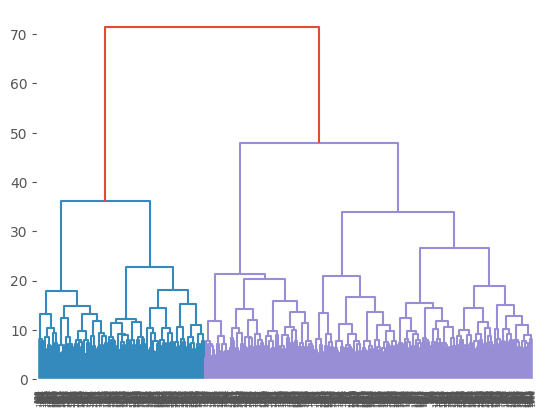

In [129]:
from scipy.cluster.hierarchy import dendrogram, ward
# using ward linkage algorithm in order to minimize cluster cluster variance
linkage_array = ward(encoded_data)
dendrogram(linkage_array)

Analyzing the dendrogram plot above, it seems like 40 is the optimal cut-off point. Hence the number of clusters identified is 3

In [131]:
# getting cluster labels
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
clusters = agg.fit_predict(encoded_data)

I will now apply T-SNE, a dimensionality reduction technique that performs well for datasets with a large number of categorical columns.<br>
Since the dataset is not big, computational cost is not going to be a problem.

In [132]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
Z = tsne.fit_transform(encoded_data)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff624938310>
Traceback (most recent call last):
  File "/home/hualcosa/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hualcosa/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hualcosa/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hualcosa/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [133]:
reduced_df = pd.DataFrame({'comp1': Z[:, 0], 'comp2': Z[:, 1], 'cluster': clusters})
reduced_df.head()

comp1      comp2  cluster
0  15.588140 -27.860844        2
1   7.703998  28.393660        0
2  20.980133  -3.000163        0
3 -24.877880 -11.215539        1
4  20.724003  22.078482        0

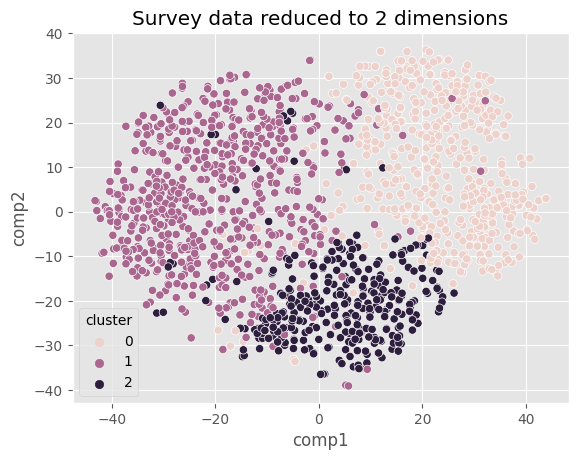

In [134]:
# visualizing the data
sns.scatterplot(x='comp1', y='comp2', hue='cluster', data=reduced_df)
plt.title('Survey data reduced to 2 dimensions')
plt.show()

Although we can note some noisy point, the clusters seems to separate the data well. Let's dig deeper into the characteristics of each cluster.

In [135]:
# adding the cluster column to the high-dimentional dataset
encoded_data['cluster'] = clusters

In [170]:
cluster_sizes = encoded_data['cluster'].value_counts().values

In [171]:
cluster_sizes

array([633, 485, 315])

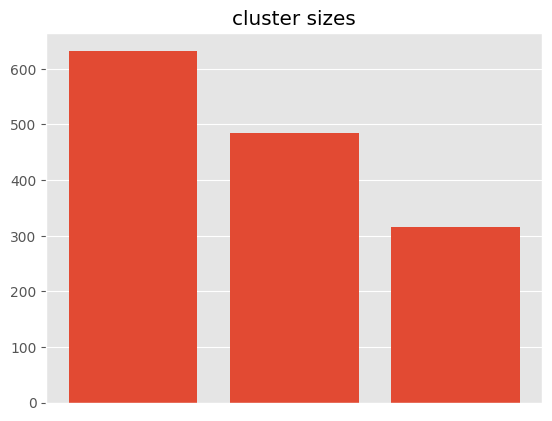

In [176]:
plt.bar(x=range(len(cluster_sizes)), height=cluster_sizes)
plt.title('cluster sizes')
plt.xticks([])
plt.show()

Let's first analyze the cluster's characteristics along each categorical colum.<br>
For this, we use the df with processed, but not yet encoded columns.

In [217]:
# assigning clusters to DF
tmp['cluster'] = clusters
#filtering Non categorical columns
df_cat = tmp.drop(columns=numerical_cols + text_cols)

In [218]:
df_cat.columns

Index(['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'mh_coverage_flag',
       'mh_coverage_awareness_flag', 'mh_employer_discussion',
       'mh_resources_provided', 'mh_anonimity_flag', 'mh_medical_leave',
       'mh_discussion_neg_impact', 'ph_discussion_neg_impact',
       'mh_discussion_cowork', 'mh_discussion_supervis', 'mh_eq_ph_employer',
       'mh_conseq_coworkers', 'prev_employers_flag', 'prev_mh_benefits',
       'prev_mh_benefits_awareness', 'prev_mh_discussion', 'prev_mh_resources',
       'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq',
       'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork',
       'prev_mh_discussion_supervisor', 'prev_mh_importance_employer',
       'prev_mh_conseq_coworkers', 'future_ph_specification',
       'future_mh_specification', 'mh_hurt_on_career', 'mh_neg_view_cowork',
       'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace',
       'mh_family_hist', 'mh_disorder_past', 'mh_disorder_current',
       'mh_diagnos_pro

In [219]:
def compare_clusters_across_dimension(c):
    '''
    display the table of frequency for categorical variable across different clusters AND
    Plot a barplot showing the distribution of categorical variable across diferent clusters
    '''
    vis_data = df_cat[['cluster', c]].value_counts().reset_index().sort_values(by='cluster')
    vis_data.columns = ['cluster', c, 'counts']
    display(vis_data)
    # plot the data
    sns.barplot(x='cluster', y='counts', hue=c, data=vis_data)
    plt.show()
    print('\n\n')

cluster  self_empl_flag  counts
0        0               0     485
1        1               0     424
3        1               1     209
2        2               0     237
4        2               1      78

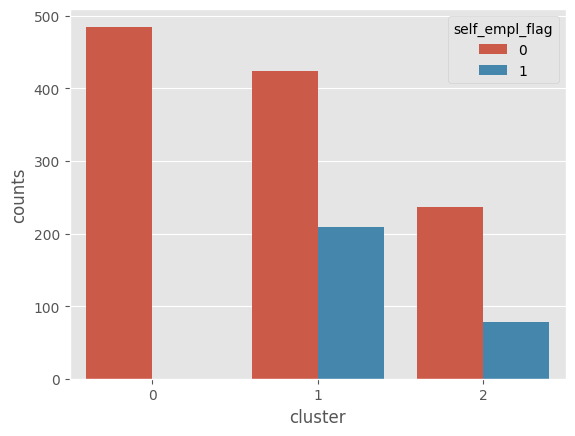

cluster comp_no_empl  counts
1         0        >1000     254
2         0         6-25     189
8         0     500-1000      29
12        0       26-100      13
0         1       26-100     378
4         1      100-500     164
6         1          1-5      38
7         1     500-1000      35
10        1         6-25      16
14        1        >1000       2
3         2       26-100     188
5         2      100-500      84
9         2          1-5      22
11        2     500-1000      16
13        2         6-25       5

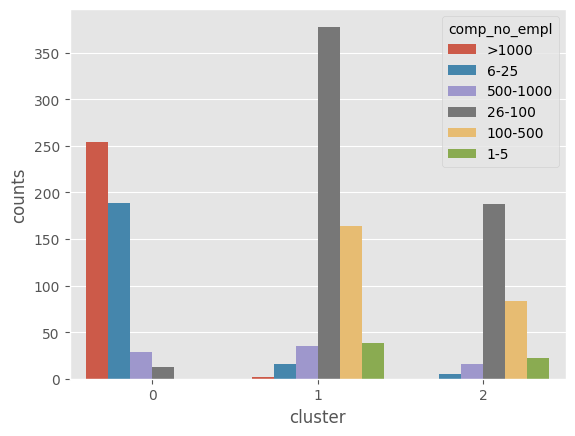

cluster  tech_comp_flag  counts
1        0             1.0     322
3        0             0.0     163
0        1             1.0     567
4        1             0.0      66
2        2             1.0     281
5        2             0.0      34

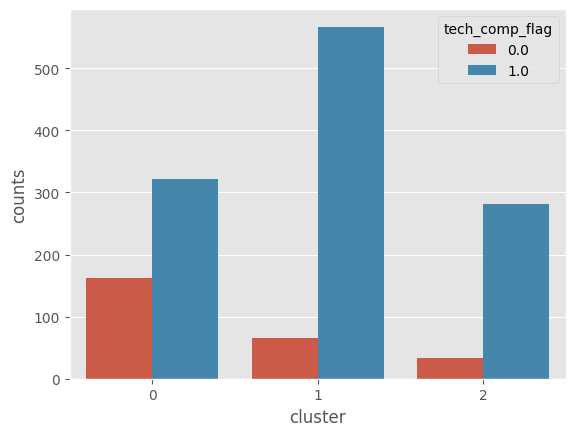

cluster                 mh_coverage_flag  counts
1         0                              Yes     226
3         0                     I don't know     122
5         0                               No     100
9         0  Not eligible for coverage / N/A      37
0         1                              Yes     441
4         1                     I don't know     105
7         1                               No      63
10        1  Not eligible for coverage / N/A      24
2         2                              Yes     151
6         2                     I don't know      92
8         2                               No      50
11        2  Not eligible for coverage / N/A      22

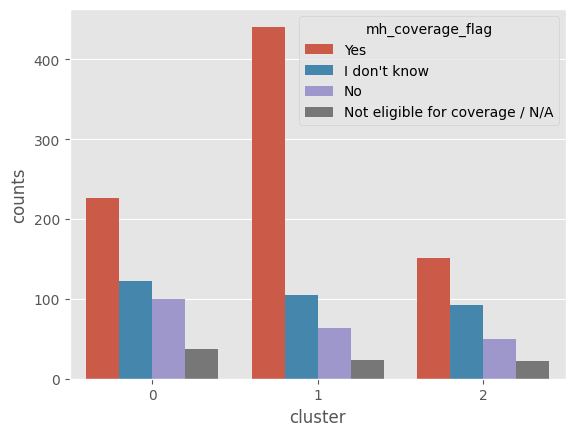

cluster mh_coverage_awareness_flag  counts
2        0                         No     209
3        0              I am not sure     162
6        0                        Yes     114
0        1                         No     354
4        1                        Yes     161
5        1              I am not sure     118
1        2                         No     211
7        2              I am not sure      72
8        2                        Yes      32

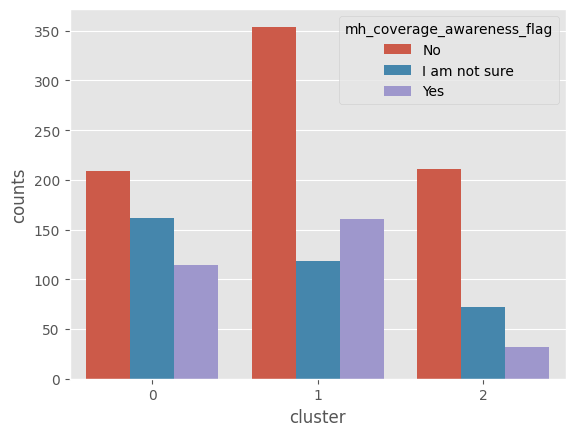

cluster mh_employer_discussion  counts
1        0                     No     326
3        0                    Yes     108
5        0           I don't know      51
0        1                     No     526
4        1                    Yes      82
8        1           I don't know      25
2        2                     No     248
6        2                    Yes      40
7        2           I don't know      27

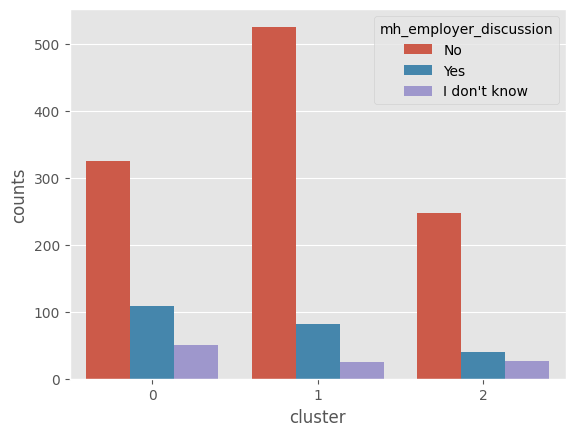

cluster mh_resources_provided  counts
1        0                    No     214
3        0                   Yes     148
4        0          I don't know     123
0        1                    No     416
5        1          I don't know     112
6        1                   Yes     105
2        2                    No     188
7        2          I don't know      85
8        2                   Yes      42

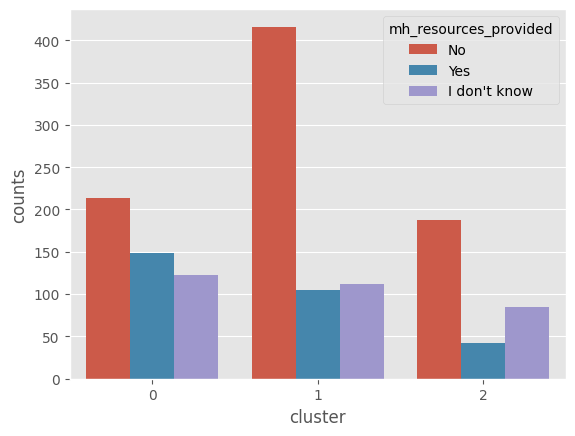

cluster mh_anonimity_flag  counts
1        0      I don't know     312
3        0               Yes     135
6        0                No      38
0        1      I don't know     481
4        1               Yes     121
7        1                No      31
2        2      I don't know     236
5        2               Yes      64
8        2                No      15

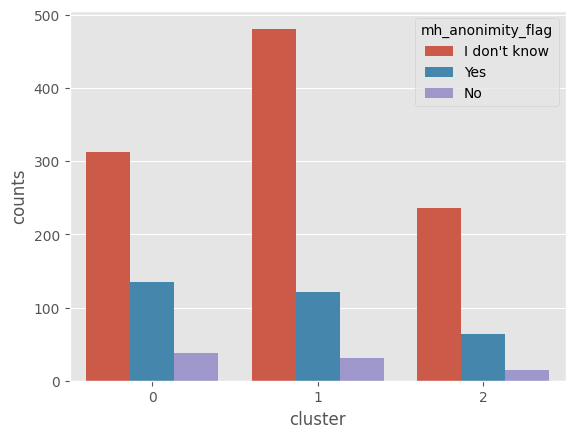

cluster            mh_medical_leave  counts
13        0              Very difficult      51
2         0               Somewhat easy     111
3         0  Neither easy nor difficult      93
4         0          Somewhat difficult      87
6         0                   Very easy      79
9         0                I don't know      64
0         1               Somewhat easy     307
12        1                I don't know      57
11        1  Neither easy nor difficult      59
10        1              Very difficult      60
8         1                   Very easy      70
5         1          Somewhat difficult      80
7         2                   Very easy      71
1         2               Somewhat easy     150
14        2          Somewhat difficult      32
15        2                I don't know      29
16        2  Neither easy nor difficult      26
17        2              Very difficult       7

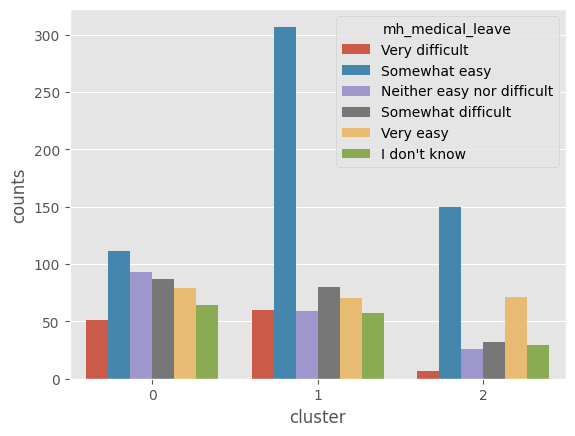

cluster mh_discussion_neg_impact  counts
1        0                    Maybe     228
3        0                       No     151
6        0                      Yes     106
0        1                    Maybe     387
4        1                       No     150
7        1                      Yes      96
2        2                    Maybe     159
5        2                       No     137
8        2                      Yes      19

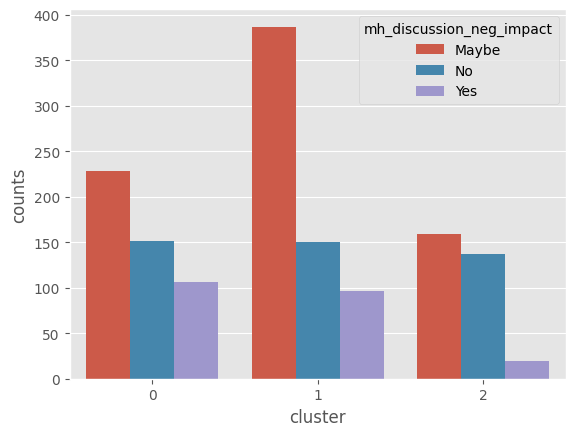

cluster ph_discussion_neg_impact  counts
1        0                       No     339
3        0                    Maybe     130
7        0                      Yes      16
0        1                       No     516
4        1                    Maybe      92
6        1                      Yes      25
2        2                       No     269
5        2                    Maybe      46

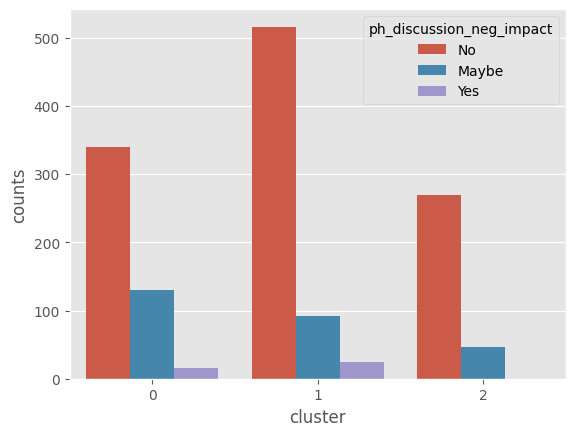

cluster mh_discussion_cowork  counts
1        0                   No     203
3        0                Maybe     182
6        0                  Yes     100
0        1                Maybe     395
4        1                   No     135
5        1                  Yes     103
2        2                Maybe     189
7        2                  Yes      72
8        2                   No      54

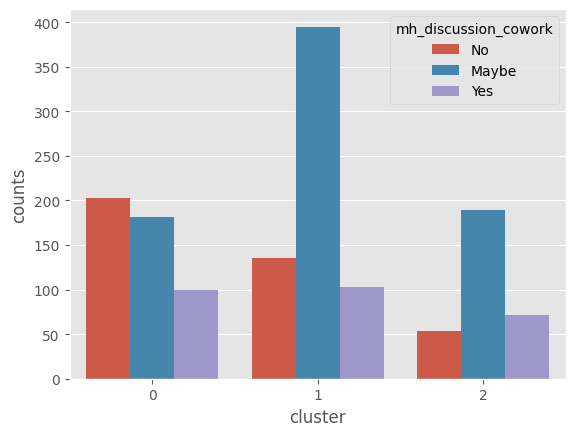

cluster mh_discussion_supervis  counts
2        0                     No     170
3        0                    Yes     163
4        0                  Maybe     152
0        1                    Yes     367
5        1                  Maybe     146
6        1                     No     120
1        2                    Yes     185
7        2                  Maybe      84
8        2                     No      46

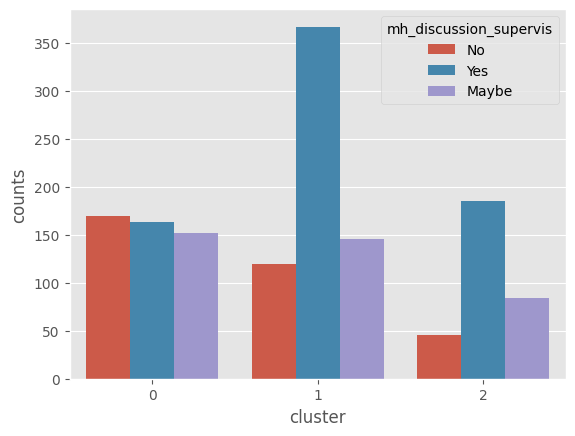

cluster mh_eq_ph_employer  counts
1        0      I don't know     207
3        0                No     145
4        0               Yes     133
0        1      I don't know     388
5        1               Yes     123
6        1                No     122
2        2      I don't know     185
7        2               Yes      94
8        2                No      36

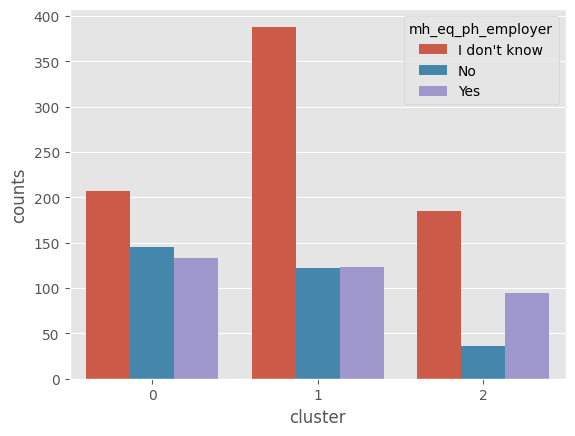

cluster mh_conseq_coworkers  counts
1        0                  No     442
4        0                 Yes      43
0        1                  No     588
3        1                 Yes      45
2        2                  No     305
5        2                 Yes      10

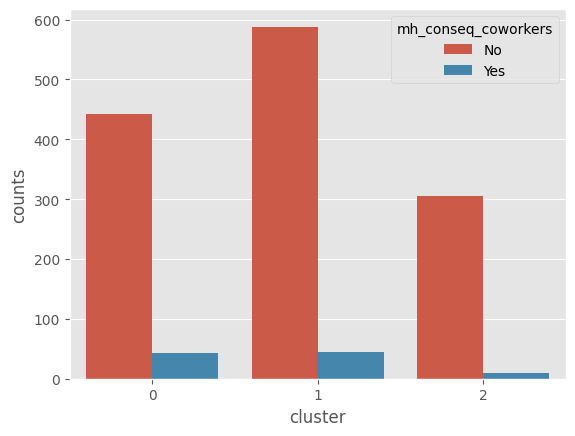

cluster  prev_employers_flag  counts
1        0                    1     425
4        0                    0      60
0        1                    1     564
3        1                    0      69
2        2                    1     275
5        2                    0      40

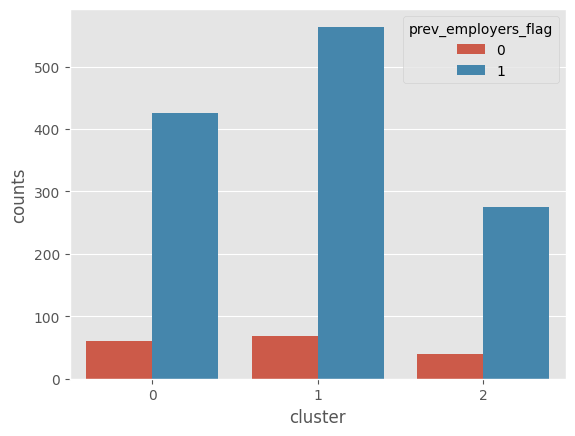

cluster   prev_mh_benefits  counts
1         0           Some did     185
3         0       No, none did     136
5         0       I don't know     106
10        0  Yes, they all did      58
0         1           Some did     273
2         1       No, none did     164
7         1  Yes, they all did      99
8         1       I don't know      97
4         2       I don't know     110
6         2           Some did     102
9         2       No, none did      72
11        2  Yes, they all did      31

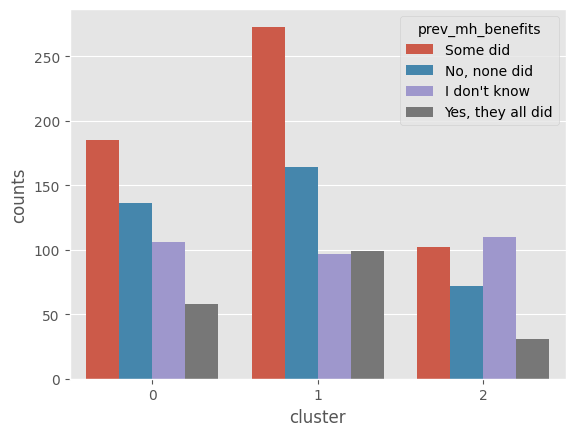

cluster       prev_mh_benefits_awareness  counts
1         0        N/A (not currently aware)     264
4         0              I was aware of some     126
6         0  Yes, I was aware of all of them      61
9         0    No, I only became aware later      34
0         1        N/A (not currently aware)     285
2         1              I was aware of some     203
5         1  Yes, I was aware of all of them      88
7         1    No, I only became aware later      57
3         2        N/A (not currently aware)     202
8         2              I was aware of some      55
10        2  Yes, I was aware of all of them      32
11        2    No, I only became aware later      26

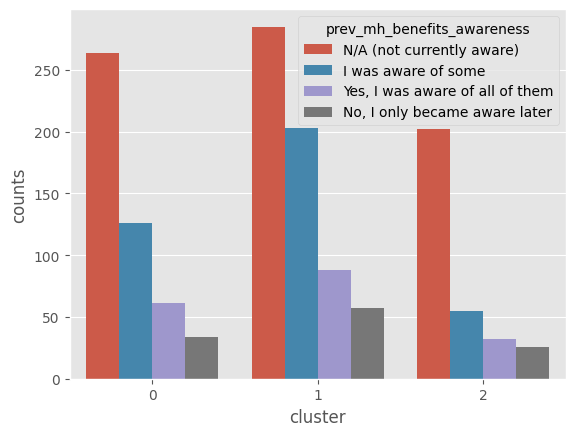

cluster prev_mh_discussion  counts
1         0           None did     339
4         0           Some did     103
6         0       I don't know      32
10        0  Yes, they all did      11
0         1           None did     480
3         1           Some did     113
7         1       I don't know      27
9         1  Yes, they all did      13
2         2           None did     240
5         2           Some did      39
8         2       I don't know      27
11        2  Yes, they all did       9

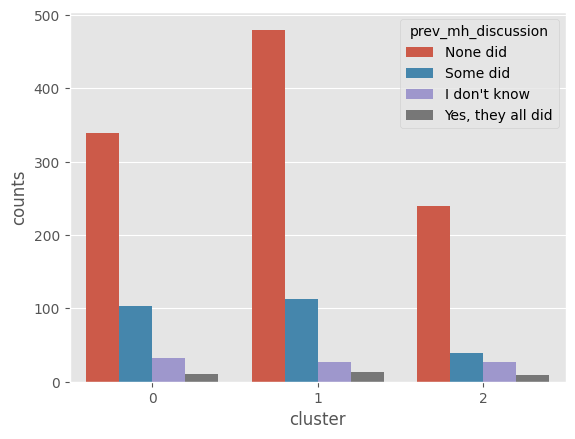

cluster  prev_mh_resources  counts
1        0           None did     322
4        0           Some did     142
6        0  Yes, they all did      21
0        1           None did     445
3        1           Some did     172
7        1  Yes, they all did      16
2        2           None did     244
5        2           Some did      57
8        2  Yes, they all did      14

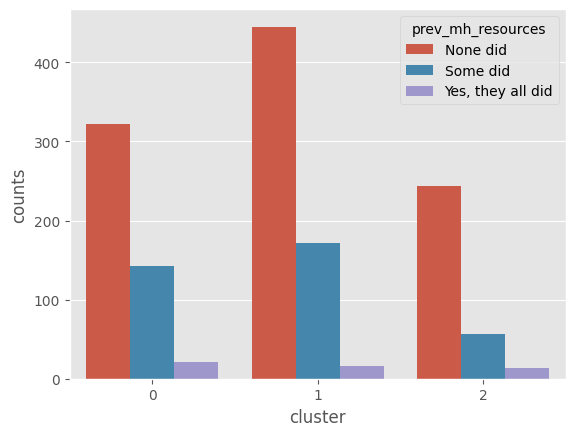

cluster prev_mh_anonimity  counts
1         0      I don't know     345
6         0       Yes, always      52
7         0                No      47
8         0         Sometimes      41
0         1      I don't know     436
3         1       Yes, always      80
4         1         Sometimes      63
5         1                No      54
2         2      I don't know     248
9         2       Yes, always      32
10        2                No      20
11        2         Sometimes      15

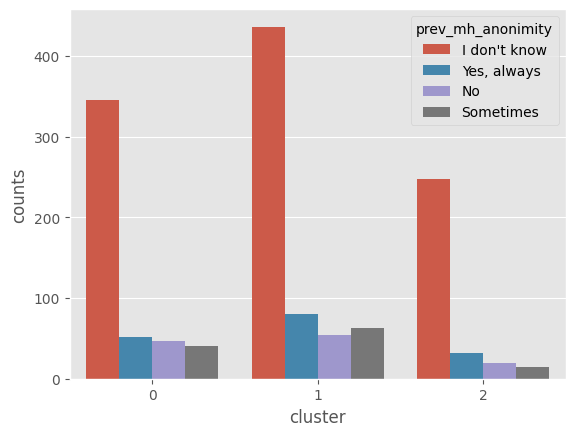

cluster prev_mh_discuss_neg_conseq  counts
1         0               Some of them     262
4         0               I don't know     114
7         0           Yes, all of them      68
8         0               None of them      41
0         1               Some of them     376
3         1           Yes, all of them     131
6         1               I don't know      92
10        1               None of them      34
2         2               Some of them     146
5         2               I don't know     104
9         2               None of them      38
11        2           Yes, all of them      27

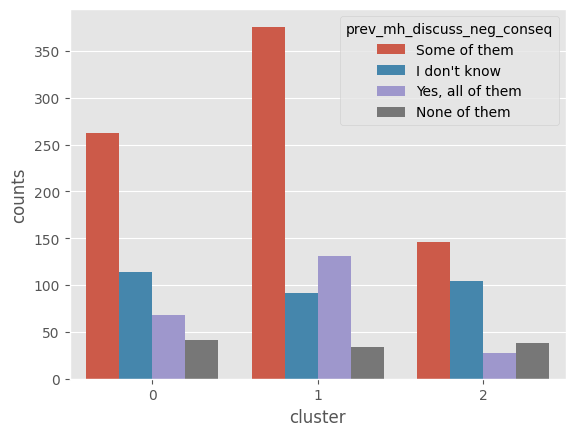

cluster prev_ph_discuss_neg_conseq  counts
1        0               Some of them     278
3        0               None of them     188
7        0           Yes, all of them      19
0        1               Some of them     366
2        1               None of them     223
6        1           Yes, all of them      44
4        2               Some of them     156
5        2               None of them     148
8        2           Yes, all of them      11

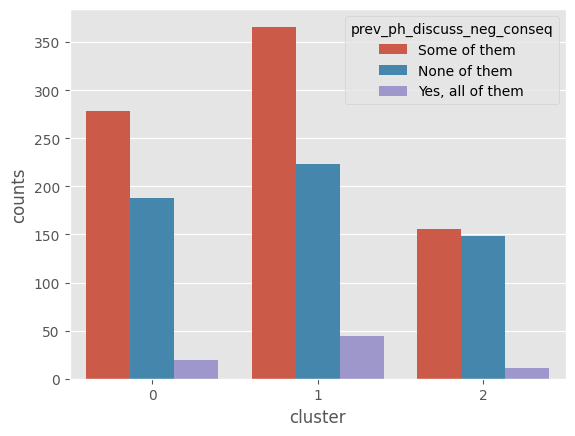

cluster             prev_mh_discussion_cowork  counts
1        0         Some of my previous employers     276
4        0  No, at none of my previous employers     173
6        0  Yes, at all of my previous employers      36
0        1         Some of my previous employers     418
3        1  No, at none of my previous employers     185
7        1  Yes, at all of my previous employers      30
2        2         Some of my previous employers     215
5        2  No, at none of my previous employers      72
8        2  Yes, at all of my previous employers      28

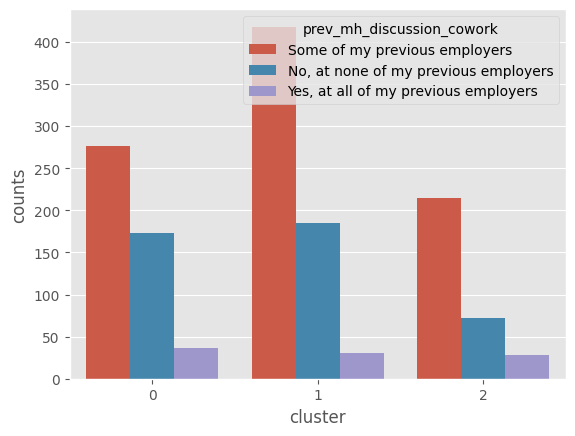

cluster         prev_mh_discussion_supervisor  counts
1         0         Some of my previous employers     263
4         0  No, at none of my previous employers     154
6         0                          I don't know      41
10        0  Yes, at all of my previous employers      27
0         1         Some of my previous employers     377
2         1  No, at none of my previous employers     192
8         1                          I don't know      33
9         1  Yes, at all of my previous employers      31
3         2         Some of my previous employers     183
5         2  No, at none of my previous employers      70
7         2  Yes, at all of my previous employers      35
11        2                          I don't know      27

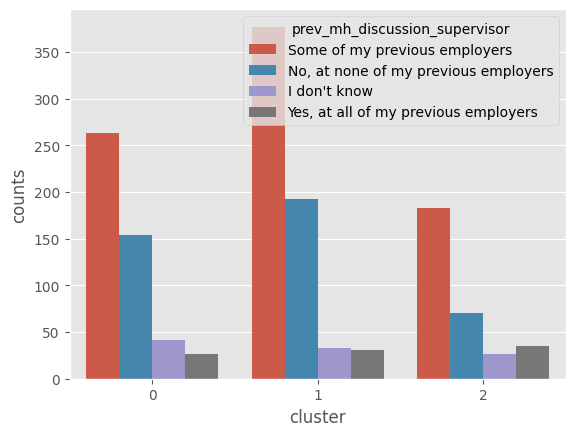

cluster prev_mh_importance_employer  counts
1         0                    None did     211
3         0                    Some did     141
6         0                I don't know     114
9         0           Yes, they all did      19
0         1                    None did     302
2         1                    Some did     209
5         1                I don't know     115
11        1           Yes, they all did       7
4         2                    None did     119
7         2                I don't know     102
8         2                    Some did      77
10        2           Yes, they all did      17

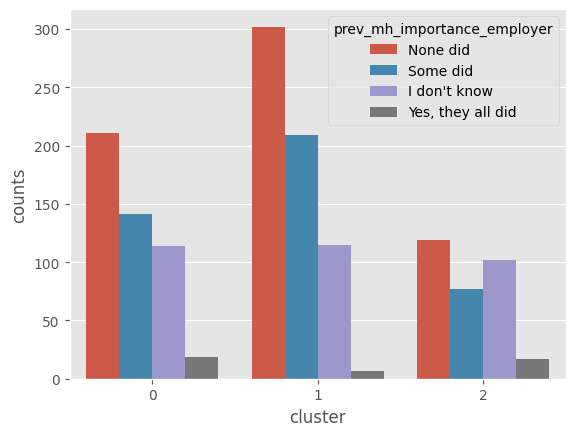

cluster prev_mh_conseq_coworkers  counts
1        0             None of them     334
4        0             Some of them     131
7        0         Yes, all of them      20
0        1             None of them     354
2        1             Some of them     246
6        1         Yes, all of them      33
3        2             None of them     239
5        2             Some of them      67
8        2         Yes, all of them       9

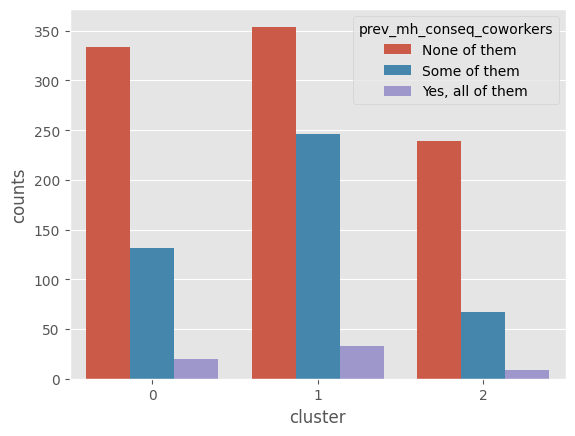

cluster future_ph_specification  counts
1        0                   Maybe     197
3        0                      No     171
6        0                     Yes     117
0        1                   Maybe     293
2        1                      No     192
4        1                     Yes     148
5        2                   Maybe     143
7        2                     Yes      94
8        2                      No      78

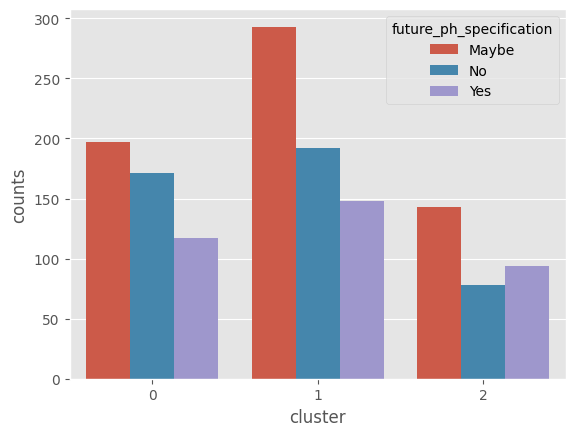

cluster future_mh_specification  counts
1        0                      No     314
5        0                   Maybe     134
7        0                     Yes      37
0        1                      No     427
2        1                   Maybe     166
6        1                     Yes      40
3        2                      No     142
4        2                   Maybe     138
8        2                     Yes      35

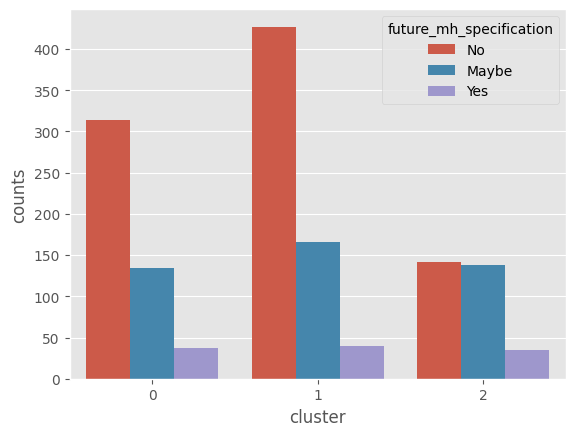

cluster           mh_hurt_on_career  counts
2         0       Yes, I think it would     210
3         0                       Maybe     183
8         0  No, I don't think it would      48
9         0                 Yes, it has      38
12        0              No, it has not       6
0         1       Yes, I think it would     256
1         1                       Maybe     232
6         1                 Yes, it has      63
7         1  No, I don't think it would      61
11        1              No, it has not      21
4         2                       Maybe     173
5         2       Yes, I think it would      97
10        2  No, I don't think it would      38
13        2                 Yes, it has       4
14        2              No, it has not       3

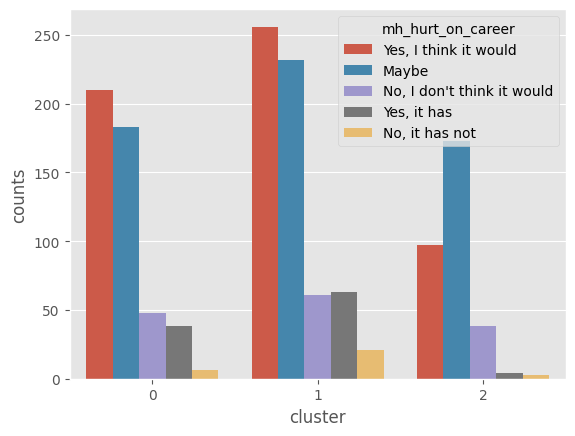

cluster            mh_neg_view_cowork  counts
1         0                         Maybe     197
3         0       Yes, I think they would     151
6         0  No, I don't think they would     113
11        0               No, they do not      12
12        0                  Yes, they do      12
0         1                         Maybe     247
2         1       Yes, I think they would     195
5         1  No, I don't think they would     128
9         1               No, they do not      34
10        1                  Yes, they do      29
4         2                         Maybe     147
7         2  No, I don't think they would     107
8         2       Yes, I think they would      57
13        2               No, they do not       3
14        2                  Yes, they do       1

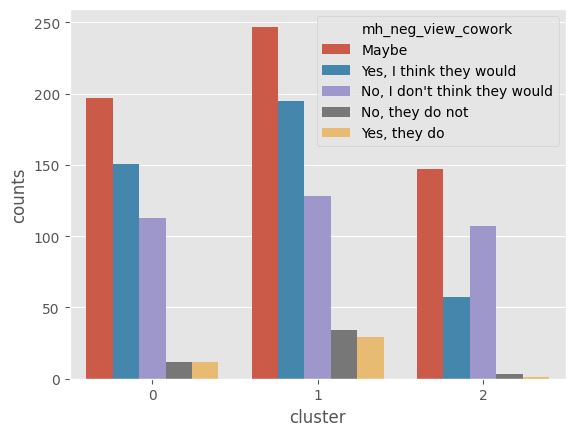

cluster                        mh_sharing_friends/fam_flag  counts
1         0                                      Somewhat open     223
14        0  Not applicable to me (I do not have a mental i...      35
13        0                                    Not open at all      36
5         0                                  Somewhat not open      77
6         0                                          Very open      65
9         0                                            Neutral      49
0         1                                      Somewhat open     289
15        1                                    Not open at all      31
8         1                                            Neutral      56
4         1                                  Somewhat not open      98
2         1                                          Very open     147
16        1  Not applicable to me (I do not have a mental i...      12
7         2  Not applicable to me (I do not have a mental i...      65
10        2                                  Somewhat not open      39
11        2                                          Very open      39
12        2                                            Neutral      36
3         2                                      Somewhat open     128
17        2                                    Not open at all       8

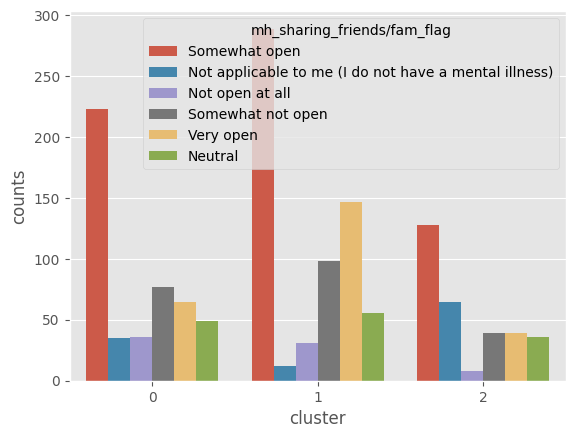

cluster mh_bad_response_workplace  counts
0         0                        No     228
5         0            Maybe/Not sure     113
7         0           Yes, I observed      94
9         0        Yes, I experienced      50
1         1                        No     225
3         1            Maybe/Not sure     173
4         1           Yes, I observed     126
6         1        Yes, I experienced     109
2         2                        No     203
8         2            Maybe/Not sure      60
10        2           Yes, I observed      44
11        2        Yes, I experienced       8

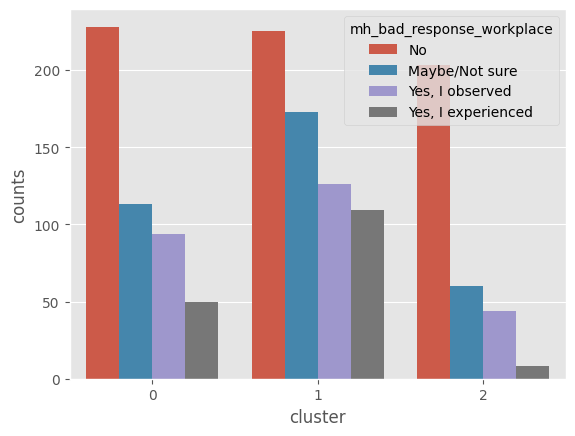

cluster mh_family_hist  counts
1        0            Yes     221
3        0             No     179
6        0   I don't know      85
0        1            Yes     394
4        1   I don't know     134
5        1             No     105
2        2             No     204
7        2   I don't know      56
8        2            Yes      55

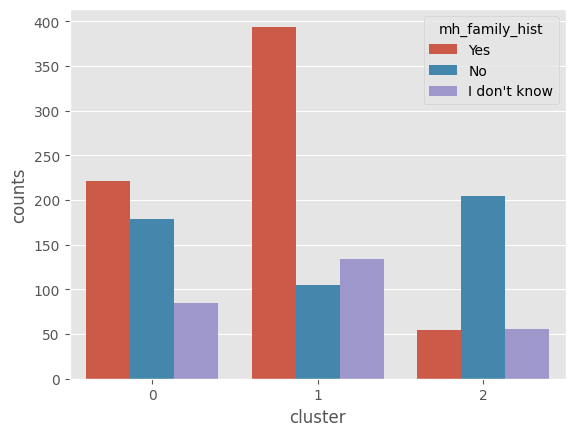

cluster mh_disorder_past  counts
1        0              Yes     242
3        0               No     167
5        0            Maybe      76
0        1              Yes     470
4        1            Maybe     117
7        1               No      46
2        2               No     238
6        2            Maybe      53
8        2              Yes      24

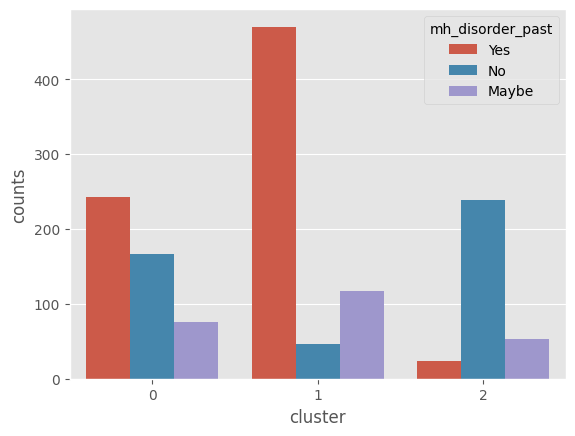

cluster mh_disorder_current  counts
2        0                  No     199
3        0                 Yes     181
5        0               Maybe     105
0        1                 Yes     381
4        1               Maybe     174
6        1                  No      78
1        2                  No     254
7        2               Maybe      48
8        2                 Yes      13

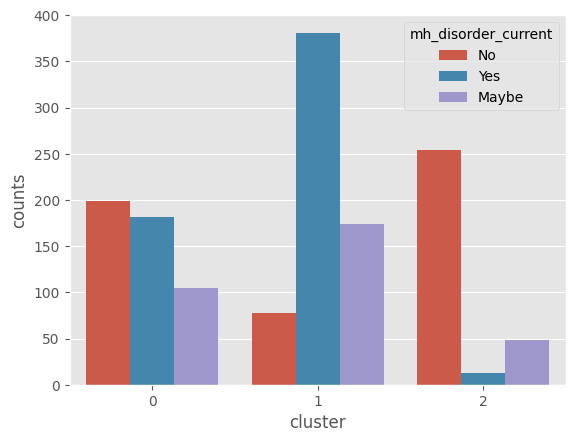

cluster mh_diagnos_proffesional  counts
2        0                      No     252
3        0                     Yes     233
0        1                     Yes     462
4        1                      No     171
1        2                      No     294
5        2                     Yes      21

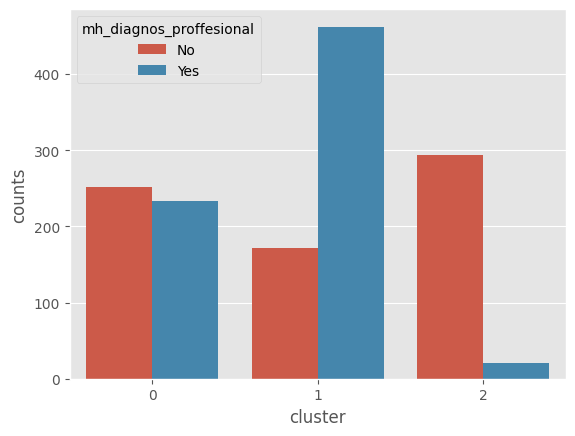

cluster  mh_sought_proffes_treatm  counts
1        0                         1     271
3        0                         0     214
0        1                         1     522
4        1                         0     111
2        2                         0     269
5        2                         1      46

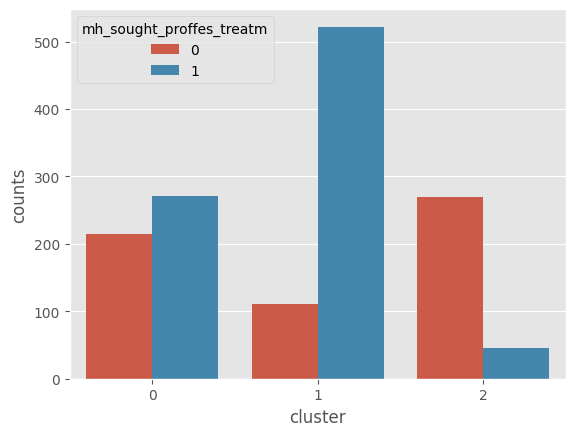

cluster mh_eff_treat_impact_on_work  counts
2         0        Not applicable to me     206
4         0                   Sometimes     113
5         0                      Rarely     102
8         0                       Never      42
10        0                       Often      22
1         1                   Sometimes     239
3         1                      Rarely     205
6         1        Not applicable to me      84
7         1                       Never      64
9         1                       Often      41
0         2        Not applicable to me     267
11        2                   Sometimes      17
12        2                      Rarely      15
13        2                       Never      14
14        2                       Often       2

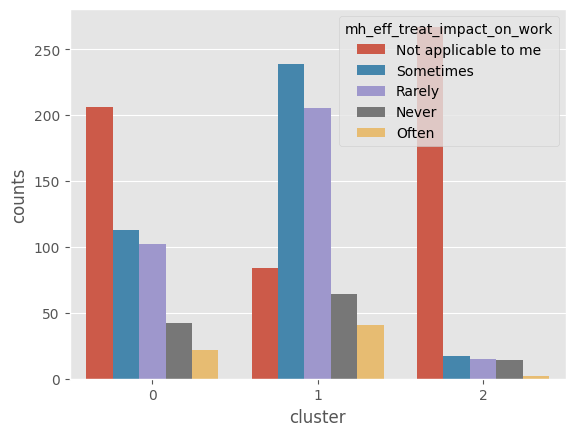

cluster mh_not_eff_treat_impact_on_work  counts
3         0            Not applicable to me     174
4         0                           Often     168
5         0                       Sometimes     120
8         0                          Rarely      20
14        0                           Never       3
0         1                           Often     354
2         1                       Sometimes     215
6         1            Not applicable to me      39
9         1                          Rarely      20
12        1                           Never       5
1         2            Not applicable to me     255
7         2                       Sometimes      28
10        2                           Often      16
11        2                          Rarely      12
13        2                           Never       4

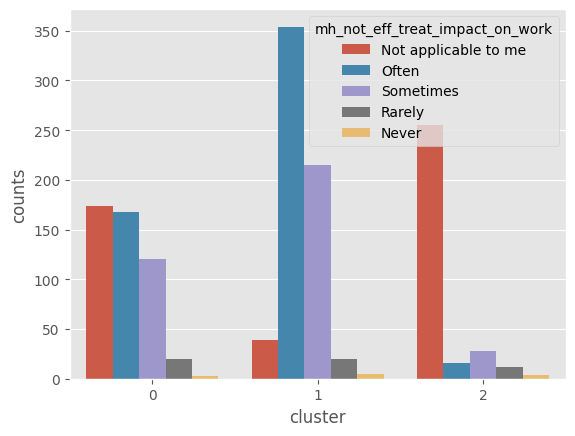

cluster     sex  counts
1        0    male     359
4        0  female     117
7        0   other       9
0        1    male     431
3        1  female     184
6        1   other      18
2        2    male     273
5        2  female      42

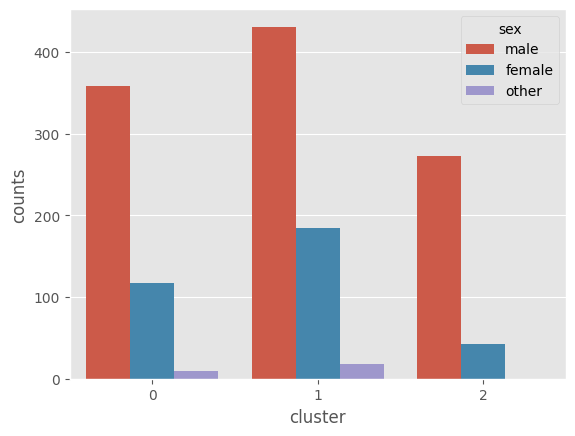

cluster              country_live  counts
10        0                    Canada      29
1         0  United States of America     296
18        0               Netherlands      12
16        0                   Germany      16
5         0                     other      61
7         0            United Kingdom      60
19        0                 Australia      11
17        1                   Germany      15
14        1                 Australia      16
12        1               Netherlands      20
0         1  United States of America     409
6         1                     other      61
3         1            United Kingdom      79
9         1                    Canada      33
11        2                   Germany      27
8         2            United Kingdom      41
13        2                    Canada      16
15        2               Netherlands      16
4         2                     other      72
2         2  United States of America     135
20        2                 Australia       8

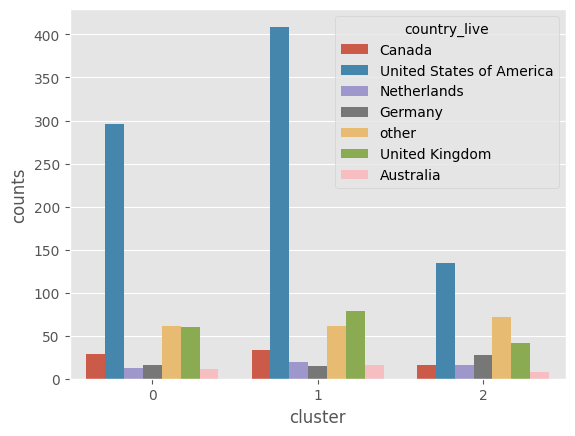

cluster live_us_teritory  counts
14        0         Illinois      20
1         0       California     225
24        0     Pennsylvania       7
21        0         Michigan      10
4         0            other     139
20        0           Oregon      13
19        0            Texas      15
18        0         New York      16
11        0       Washington      20
12        0        Minnesota      20
17        1           Oregon      17
15        1       Washington      18
13        1        Minnesota      20
0         1       California     301
9         1         Michigan      21
8         1         New York      24
7         1            Texas      24
6         1         Illinois      26
3         1            other     161
10        1     Pennsylvania      21
28        2            Texas       4
16        2         Michigan      17
5         2            other      63
22        2         Illinois      10
23        2           Oregon       7
2         2       California     197
25        2         New York       5
26        2     Pennsylvania       5
27        2       Washington       5
29        2        Minnesota       2

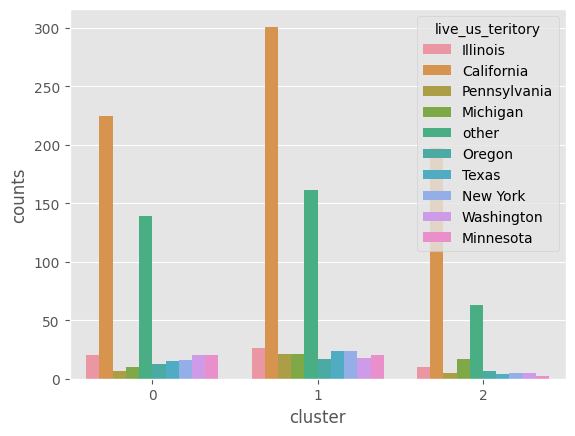

cluster              country_work  counts
10        0                    Canada      29
1         0  United States of America     295
18        0               Netherlands      12
5         0                     other      62
6         0            United Kingdom      60
14        0                   Germany      16
19        0                 Australia      11
16        1                 Australia      15
15        1                   Germany      15
12        1               Netherlands      19
0         1  United States of America     415
7         1                     other      57
3         1            United Kingdom      81
9         1                    Canada      31
11        2                   Germany      27
8         2            United Kingdom      42
13        2               Netherlands      16
4         2                     other      67
17        2                    Canada      14
2         2  United States of America     141
20        2                 Australia       8

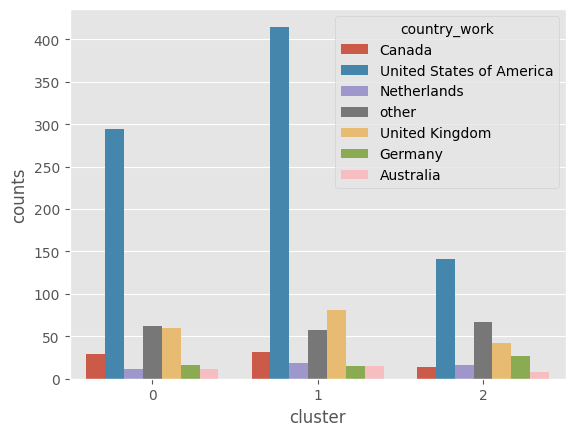

cluster work_us_teritory  counts
1         0       California     227
25        0     Pennsylvania       6
22        0         Michigan       9
4         0            other     141
21        0           Oregon      11
19        0            Texas      15
17        0         New York      17
15        0       Washington      19
13        0         Illinois      20
11        0        Minnesota      20
0         1       California     301
18        1           Oregon      15
14        1       Washington      19
10        1        Minnesota      21
9         1     Pennsylvania      22
8         1            Texas      25
7         1         New York      26
6         1         Illinois      27
12        1         Michigan      20
3         1            other     157
27        2            Texas       4
26        2     Pennsylvania       4
2         2       California     195
24        2         New York       6
5         2            other      63
20        2         Illinois      11
16        2         Michigan      18
28        2       Washington       4
23        2           Oregon       8
29        2        Minnesota       2

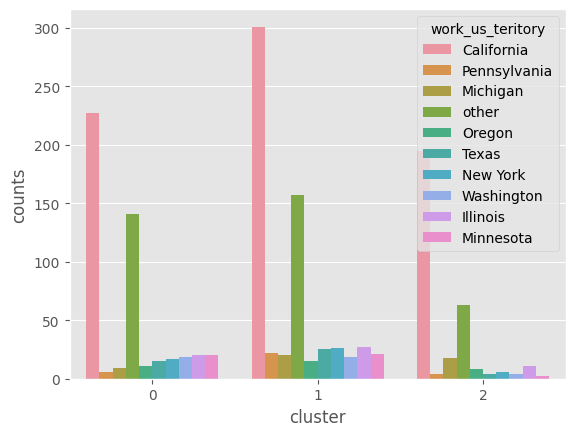

cluster                                      work_position  counts
208        0  DevOps/SysAdmin|Front-end Developer|Back-end D...       1
106        0                                              Sales       2
105        0  Supervisor/Team Lead|Back-end Developer|DevOps...       2
104        0                                                 HR       2
103        0                      Other|Dev Evangelist/Advocate       2
203        0  Back-end Developer|DevOps/SysAdmin|Supervisor/...       1
101        0     Support|Front-end Developer|Back-end Developer       2
148        0  Front-end Developer|Back-end Developer|Support...       1
297        0  Supervisor/Team Lead|DevOps/SysAdmin|Support|F...       1
299        0            Supervisor/Team Lead|DevOps/SysAdmin|HR       1
155        0  Front-end Developer|Back-end Developer|Support...       1
302        0                      Supervisor/Team Lead|Designer       1
157        0  Front-end Developer|Back-end Developer|Support...       1
307        0  Other|Front-end Developer|Designer|One-person ...       1
160        0       HR|Supervisor/Team Lead|Executive Leadership       1
259        0  Supervisor/Team Lead|Designer|Front-end Develo...       1
162        0  Front-end Developer|Back-end Developer|Support...       1
164        0  Front-end Developer|Back-end Developer|Executi...       1
314        0   Other|DevOps/SysAdmin|Support|Back-end Developer       1
315        0              Other|Dev Evangelist/Advocate|Support       1
316        0  Other|Dev Evangelist/Advocate|Back-end Develop...       1
167        0            DevOps/SysAdmin|Support|One-person shop       1
71         0    Back-end Developer|Front-end Developer|Designer       3
276        0               Support|Designer|Front-end Developer       1
69         0                                    One-person shop       3
67         0                 Back-end Developer|One-person shop       3
66         0  Front-end Developer|Back-end Developer|Supervi...       3
253        0  Supervisor/Team Lead|Dev Evangelist/Advocate|B...       1
107        0  Other|Supervisor/Team Lead|Back-end Developer|...       2
173        0                       Supervisor/Team Lead|Support       1
108        0            Dev Evangelist/Advocate|DevOps/SysAdmin       2
110        0     Front-end Developer|Back-end Developer|Support       2
277        0                         Supervisor/Team Lead|Other       1
278        0               Support|Front-end Developer|Designer       1
136        0  Executive Leadership|DevOps/SysAdmin|Back-end ...       1
279        0  Supervisor/Team Lead|Front-end Developer|Designer       1
280        0  Supervisor/Team Lead|Front-end Developer|Back-...       1
281        0  Supervisor/Team Lead|Front-end Developer|Back-...       1
132        0  Front-end Developer|Back-end Developer|Dev Eva...       1
131        0  Executive Leadership|Supervisor/Team Lead|Back...       1
274        0                         Support|Back-end Developer       1
142        0       Executive Leadership|Dev Evangelist/Advocate       1
128        0  Executive Leadership|Supervisor/Team Lead|Back...       1
284        0  Supervisor/Team Lead|Front-end Developer|Back-...       1
126        0  Executive Leadership|Supervisor/Team Lead|Dev ...       1
125        0  Executive Leadership|Supervisor/Team Lead|Fron...       1
273        0                         Supervisor/Team Lead|Sales       1
272        0           Supervisor/Team Lead|Front-end Developer       1
121        0  One-person shop|Front-end Developer|Back-end D...       1
120        0  Executive Leadership|Supervisor/Team Lead|HR|D...       1
119        0    Executive Leadership|Supervisor/Team Lead|Sales       1
288        0          Supervisor/Team Lead|Executive Leadership       1
117        0                       Designer|Front-end Developer       2
116        0                           Other|Back-end Developer       2
115        0            Back-end Developer|Su

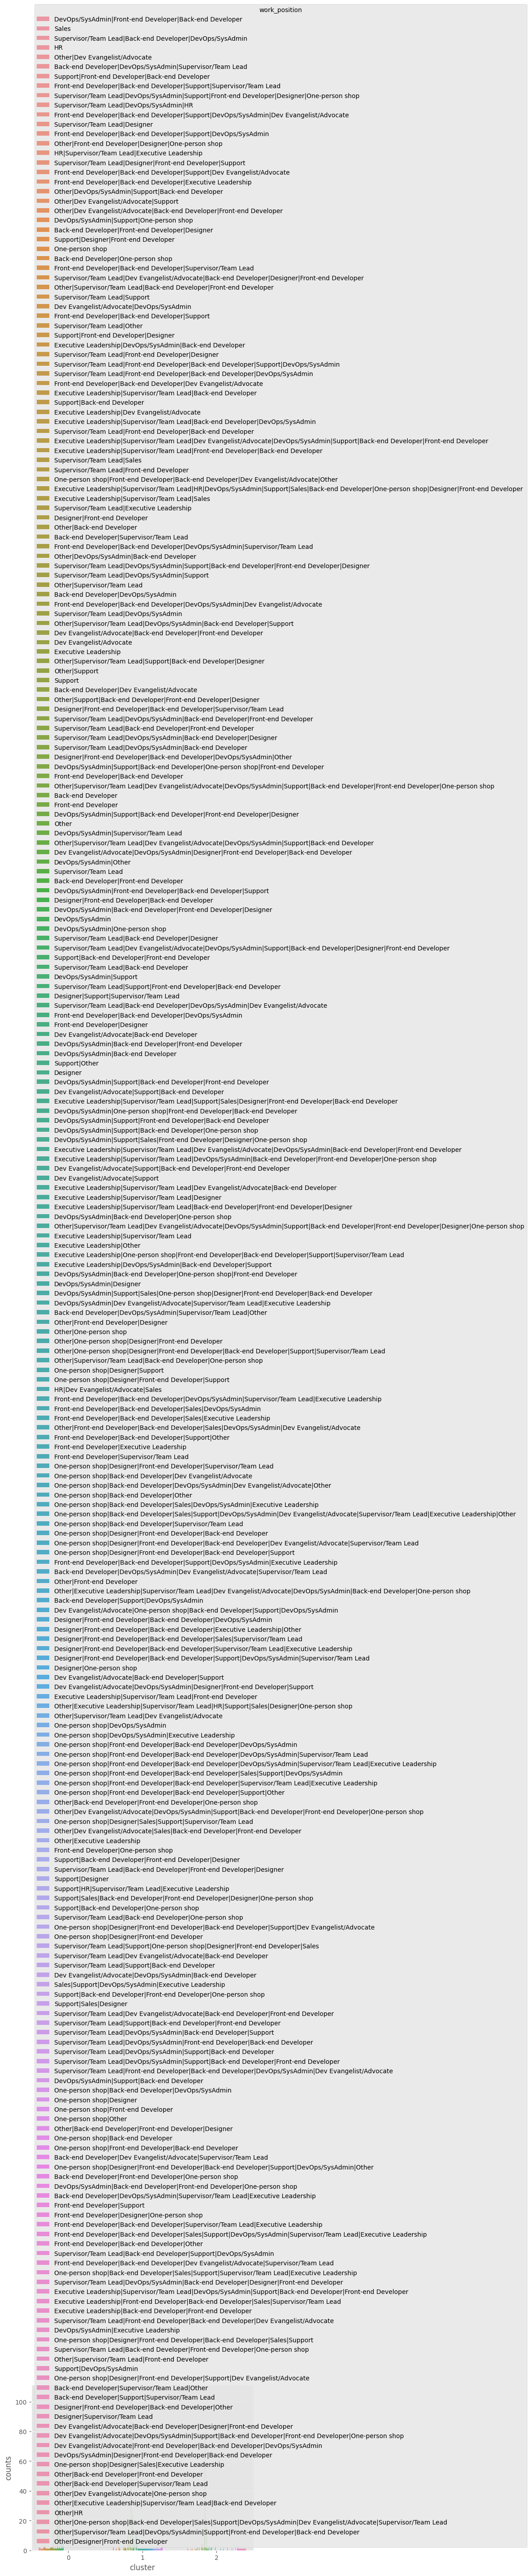

cluster remote_flag  counts
1        0   Sometimes     259
4        0       Never     156
7        0      Always      70
0        1   Sometimes     328
2        1      Always     191
5        1       Never     114
3        2   Sometimes     170
6        2      Always      82
8        2       Never      63

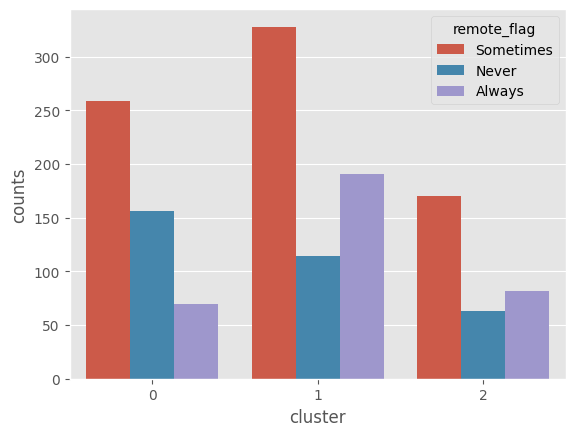

cluster  tech_role_flag  counts
1        0               1     341
4        0               0     144
0        1               1     439
3        1               0     194
2        2               1     227
5        2               0      88

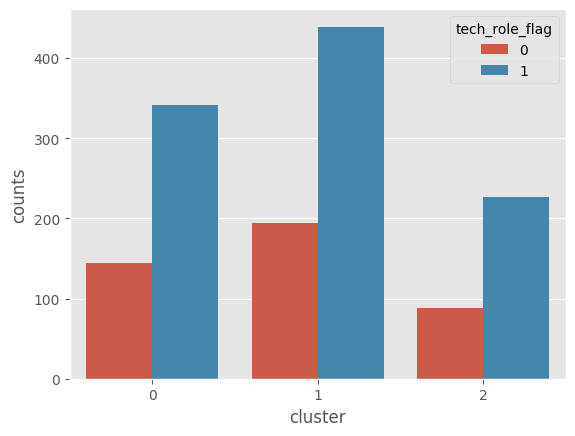

In [221]:
for c in df_cat.columns[:-1]:
    compare_clusters_across_dimension(c)

Based on the above graphs we can conclude the folling:

# Cluster 0 
- Comprised mostly of employees 

- Formed mostly by employees who work at companies with more than 1000 employees 

- Formed by employees who work at companies where is not somewhat easy to ask for a leave because of mental health issues  

- Most people in this cluster would not feel safe talking about mental health issue with a coworker 

# Cluster 1 

- People who have had mental issues on the past 

- People who currently have a mental disorder 

- Most people were diagnosed as having a mental disorder 

- Most people in cluster 1 sought professional treatment 

- Most tech employees 

- Formed mostly by employees who work at companies with 26-100 employees 

- Employees who work at Companies mostly offer mental health benefits 

- Employees are highly unconfident whether they will suffer negative consequences If they discuss about mental health issues 

- The majority of people feel  comfortable discussing a mental health issue with their bosses 

- People in this cluster are more open to share with friends and family that they suffer mental health  

- Experienced/observe more negative responses in their previous workplace compared to other clusters 

- Family of this cluster members have bigger mental health issues history 

- People with mental health few that their problem contributes to not being treated effectively 

# Cluster 2 

- Most people in this cluster didn't have mental health problems in the past 

- Most people doesn't have a mental disorder 

- Most people were not diagnosed with mental disorder 

- Formed mostly by employee who work at companies with 26-500 employees 

- Formed by employees particularly unaware of the mental health benefits the company provides 

- Employees under this category have less mental health resources provided 

- Has a higher proportion of people who never had discussions about mental health with their supervisors 

- Has a higher proportion of people whose previous employers didn't take mental health issues as serious as physical health 

- Only cluster where the proportion of people who would be willing to bring up a physical health problem to an employee is bigger than those who doesn't 

- People in this cluster are proportionately less afraid to bring up mental health issues with a potential employer 

- People in this cluster are less inclined to believe that being identified with mental health issues will hurt their career  

- People in this cluster are less inclined to believed that they would be view negatively if their coworkers knew they suffer from mental health 

- Family of these cluster member mostly don't have mental health issues 